In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras import models, layers, optimizers

Using TensorFlow backend.


In [3]:
df = pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')
df.head(3)
df.info()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 10 columns):
clump_thickness                554 non-null float64
uniformity_of_cell_size        554 non-null float64
uniformity_of_cell_shape       554 non-null float64
marginal_adhesion              554 non-null float64
single_epithelial_cell_size    554 non-null float64
bare_nuclei                    554 non-null float64
bland_chromatin                554 non-null float64
normal_nucleoli                554 non-null float64
mitosis                        554 non-null float64
class                          554 non-null float64
dtypes: float64(10)
memory usage: 43.4 KB


In [4]:
def one_hot_encoding(df):
    result = []
    for data in np.array(df.iloc[:, -1]):
        result.append([0 if i!=data else 1 for i in range(len(df.iloc[:, -1].unique()))])
    return result

In [5]:
# df = pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')
x_train = np.array(df.iloc[:500, :-1])
x_test = np.array(df.iloc[500:, :-1])

target = np.array(df.iloc[:, -1])
target_encoded = []
for data in target:
    tmp = [0, 0]
    if data == 2:
        tmp[0] = 1
    if data == 4:
        tmp[1] = 1
    target_encoded.append(tmp)

y_train = np.array(target_encoded[:500])
y_test = np.array(target_encoded[500:])

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_y = to_categorical(target)
one_hot_y

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(9,)))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train,
                   epochs=20,
                   batch_size=20,
                   validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 500 samples, validate on 54 samples
Epoch 1/20
500/500 [==============================] - 1s 1ms/step - loss: 0.6351 - acc: 0.5940 - val_loss: 0.6012 - val_acc: 0.6852
Epoch 2/20
500/500 [==============================] - 0s 68us/step - loss: 0.5051 - acc: 0.8280 - val_loss: 0.4856 - val_acc: 0.8704
Epoch 3/20
500/500 [==============================] - 0s 88us/step - loss: 0.4424 - acc: 0.8640 - val_loss: 0.3951 - val_acc: 0.9630
Epoch 4/20
500/500 [==============================] - 0s 68us/step - loss: 0.3988 - acc: 0.9020 - val_loss: 0.3453 - val_acc: 0.9815
Epoch 5/20
500/500 [==============================] - 0s 78us/step - loss: 0.3631 - acc: 0.9100 - val_loss: 0.2519 - val_acc: 0.9630
Epoch 6/20
500/500 [==============================] - 0s 68us/step - loss: 0.3364 - acc: 0.9100 - val_loss: 0.2551 - val_acc: 0.9815
Epoch 7/20
500/500 [==================

Text(0.5, 1.0, 'Training and Validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

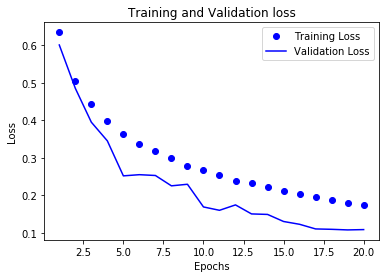

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

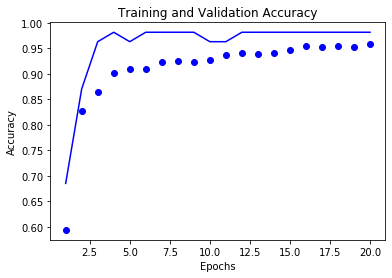

In [9]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [10]:
results = model.evaluate()

ValueError: If evaluating from data tensors, you should specify the `steps` argument.